# 1. 用KNN给下述数据集聚类，用uniform weighting方法，k=1，

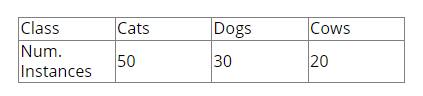

求：
 - accuracy
 - 假如取k=数据点个数，accuracy？

解：

 - k=1时，每个点都用自己给自己标类，所以精确度应该是100%
 - k=数据集数量时，所有点都被标为数据集中多数的那个类（cats），所以精确度应该是50%

# 2. 以下哪个数据集符合朴素贝叶斯的假设？

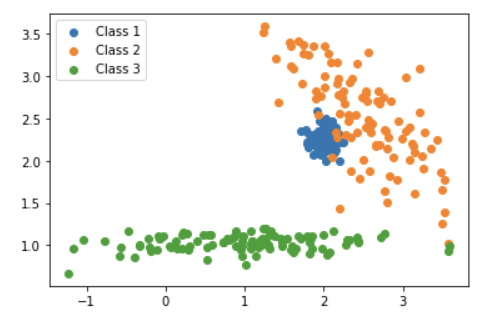

解：点云的椭圆长轴如果不是沿某一轴，那就不符合朴素贝叶斯的假设

13吧大概

# 3. 对于以下数据集：

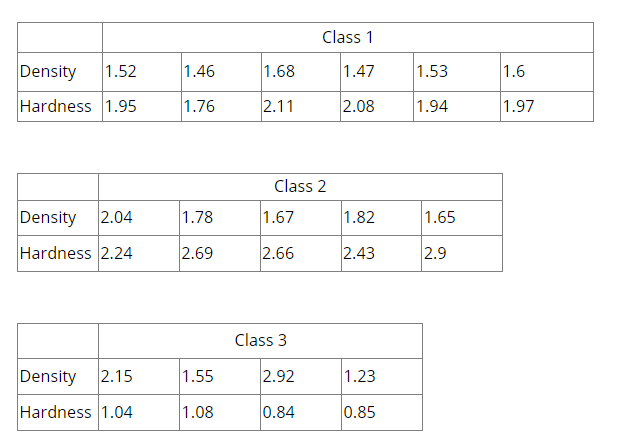

用朴素贝叶斯（高斯分布版）对数据建模。

$$
L = log(P(c))+log(P(x_1|c))log(P(x_2|c))
$$

其中x1，x2是density和hardness

求：
 - 各个P(c)
 - 对于数据点`(2,2.1)`，求其对三个类的L，以及它的最终分类

解：

 - P(C): P(1) = 6/(6+5+4) = 6/15, P(2) = 5/15, P(3) = 4/15
 

In [2]:
import math
import numpy as np

'''
description: 计算一个feature值对给定分布的隶属度的函数
return {隶属度}
'''
def normal_distribution(feature_value, mean, sd):
    return math.log(1/sd/math.sqrt(2*math.pi)*math.exp(-0.5*((feature_value-mean)/sd)**2))

# feature1:
# print("featre1:Petal Length:" + str(normal_distribution(5,1.5,0.14)))

# feature2: feature2的计算会报错，因为exp部分太小，exp函数返回了一个0.0，log(0)是非法的
#print("featre2:Petal Width:" + str(normal_distribution(2.0,0.22,0.04)))

In [3]:
# 录入三类的数据
c1_d = [1.52,1.46,1.68,1.47,1.53,1.6]
c1_h = [1.95,1.76,2.11,2.08,1.94,1.97]

c2_d = [2.04,1.78,1.67,1.82,1.65]
c2_h = [2.24,2.69,2.66,2.43,2.9]

c3_d = [2.15,1.55,2.92,1.23]
c3_h = [1.04,1.08,0.84,0.85]

c1_d_mean = np.mean(c1_d)
c1_d_sd = np.std(c1_d)
c1_h_mean = np.mean(c1_h)
c1_h_sd = np.std(c1_h)

c2_d_mean = np.mean(c2_d)
c2_d_sd = np.std(c2_d)
c2_h_mean = np.mean(c2_h)
c2_h_sd = np.std(c2_h)

c3_d_mean = np.mean(c3_d)
c3_d_sd = np.std(c3_d)
c3_h_mean = np.mean(c3_h)
c3_h_sd = np.std(c3_h)

P1 = 6/15
P2 = 5/15
P3 = 4/15

x1_d = 2
x1_h = 2.1

L1 = math.log(P1)+normal_distribution(x1_d,c1_d_mean,c1_d_sd)+normal_distribution(x1_h,c1_h_mean,c1_h_sd)

L2 = math.log(P2)+normal_distribution(x1_d,c2_d_mean,c2_d_sd)+normal_distribution(x1_h,c2_h_mean,c2_h_sd)

L3 = math.log(P3)+normal_distribution(x1_d,c3_d_mean,c3_d_sd)+normal_distribution(x1_h,c3_h_mean,c3_h_sd)

print([L1,L2,L3])

[-16.587871183285813, -2.8587972246847793, -56.442947368638386]


# 4. 对下图用UCS，找一条从H到G的路
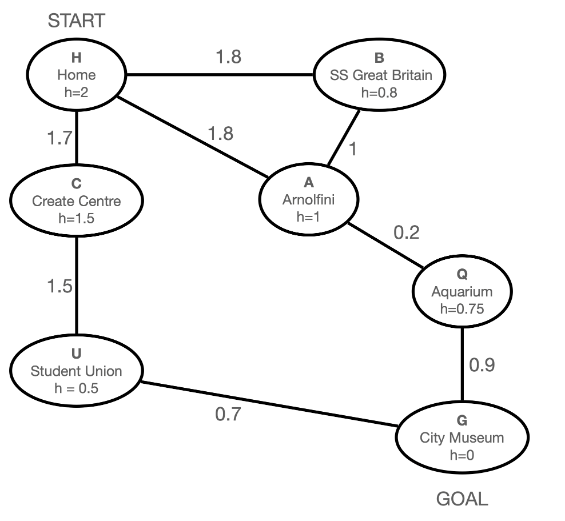

解：

 - 扩H：HB(1.8) HC(1.7) HA(1.8)
 - 扩C：HCU(3.2) HB(1.8) HA(1.8)
 - 扩A：HAQ（2.0）HB（1.8）HCU（3.2）
 - 扩B：*HBA（2.8）*HAQ（2.0）HCU（3.2） （死路）
 - 扩Q：HAQG（2.9）*HBA（2.8）*HCU（3.2）
 - 扩G：结束。结果HAQG。

# 5. 用A*对下图进行搜索，找一条H到G的路
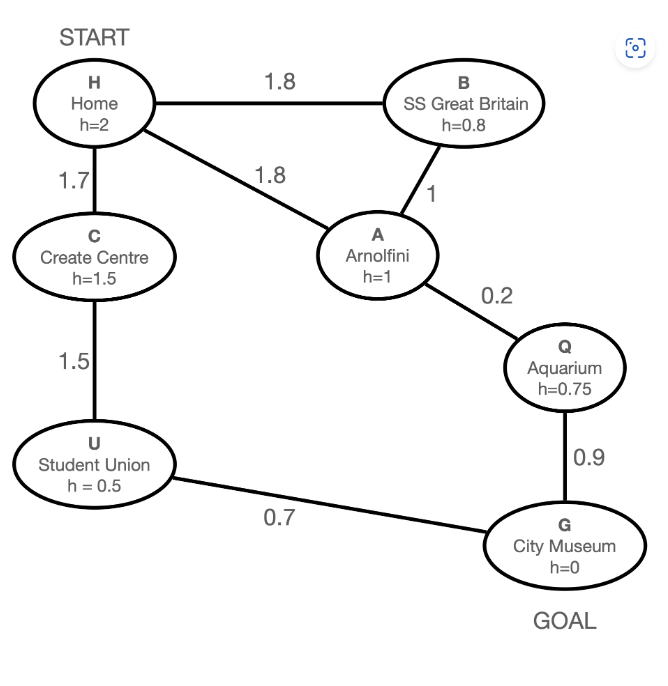

 - 启发式函数可接受吗？
 - 启发式函数连续吗？
  

解：


 - 可接受：T
 - 连续：A的h不行了

 - 扩H HA（2.8）HB（2.6）HC（3.2）
 - 扩B HA（2.8）HBA（3.8）HC（3.2）
 - 扩A HAQ（2.75）HBA（3.8）HC（3.2）
 - 扩Q HAQG（2.9）HBA（3.8）HC（3.2）
 - 扩G 结束

 # 6. 贝叶斯网络

 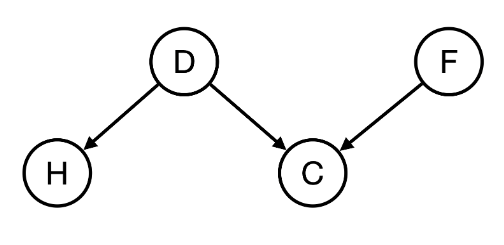

 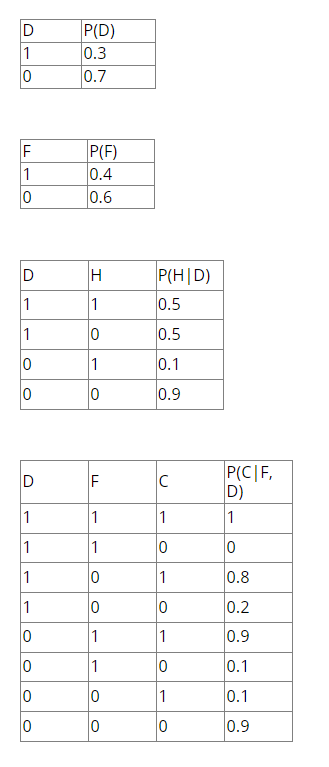

 求：
  - P(H=1)
  - P(D=1|H=1)
  - P(D=1|C=1,F=1)

解：

1. P(H=1) = D0H1+D1H1
2. P(D=1|H=1) = D1H1/(D1H1+D0H1)
3. P(D=1|C=1,F=1) = D1C1/(D1C1+D0C1) F应该和这个没关系
   1. 还要先求D1C1,D0C1
      1. P(D=1，C=1) = D1C1/最后那个表一切
      2. P(D=0, C=1) = D0C1/最后那个表一切

In [4]:
D0 = 0.7
D1 = 0.3

H1_D1 = 0.5
H0_D1 = 0.5
H1_D0 = 0.1
H0_D0 = 0.9

print("第一问：")
print(D0*H1_D0+D1*H1_D1)

print("第二问：")
print(D1*H1_D1/(D0*H1_D0+D1*H1_D1))

# 求解第三问：
F0 = 0.6
F1 = 0.4

F1C1D1 = 1*F1*D1
F1C0D1 = 0
F0C1D1 = 0.8*F0*D1
F0C0D1 = 0.2*F0*D1
F1C1D0 = 0.9*F1*D0
F1C0D0 = 0.1*F1*D0
F0C1D0 = 0.1*F0*D0
F0C0D0 = 0.9*F0*D0

lis = [F1C1D1,F1C0D1,F0C1D1,F0C0D1,F1C1D0,F1C0D0,F0C1D0,F0C0D0]

SUM = np.sum(lis)

D1C1 = (F1C1D1+F0C1D1)/SUM
D0C1 = (F1C1D0+F1C1D0)/SUM

print("第三问：")
print(D1C1/(D1C1+D0C1))


第一问：
0.21999999999999997
第二问：
0.6818181818181819
第三问：
0.34375


# 7. 对于两个二进制串：

A = 1101001

B = 1010010

1. 在point3进行single point crossover（A'保留A的第一段，B'保留B的第一段）
2. A'在point2，4上进行swap
3. B'在point3，6上进行swap

将两个结果解为十进制值。

解：

1. crossover:
   A: 110,1001
   B: 101,0010

   A': 110,0010
   B': 101,1001

2. swap A': 11*0*0*0*10 = 1100010 = 98
3. swap B': 101**1**00**1** = 1011001 = 59
   

# 8. 对于以下的2x3grid world：

下图中显示了其reward

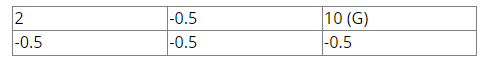

discount 0.9
往前0.8 两侧0.1

假设U均初始化为reward值，在迭代一轮后：求：
 - （1，2）的U
 - （1，3）的U
 - （2，1）的U
 - （2，2）的U

收敛后长这样：  

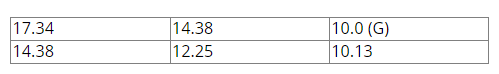

收敛后，会能走到终点吗？（T\F）

In [5]:
gamma = 0.9

Re = 2

Fwd = 17.34

L = 17.43

R = 14.38

result = Re+gamma*(0.8*Fwd+0.1*L+0.1*R)

print(result)


17.347700000000003


解：

|  1.075   |  6.61(R)  |10(G)|
|:-:|:-:|:-:|
|      |  -0.95(都一样)  |  6.61（U）|